<a href="https://colab.research.google.com/github/nv-hiep/ML/blob/main/Classification_Logistic_Regression%2C_LDA%2C_QDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

**In this example, we will classify mushrooms as being edible or poisonous depending on different features. Logistic regression, linear discriminant analysis (LDA) and quadratic discriminant analysis (QDA) will be used.**

The data set contains 8124 rows and the following features:

class: edible(e) or poisonous(p)

cap-shape: bell(b), conical(c), convex(x), flat(f), knobbed(k), sunken(s)

cap-surface: fibrous(f), grooves(g), scaly(y), smooth(s)

cap-color: brown(n), buff(b), cinnamon(c), gray(g), green(r), pink(p), purple(u), red(e), white(w), yellow(y)

bruises: bruises(t), no bruises(f)

odor: almond(a), anise(l), creosote(c), fishy(y), foul(f), musty(m), none(n), pungent(p), spicy(s)

gill-attachment: attached(a), descending(d), free(f), notched(n)

gill-spacing: close(c), crowded(w), distant(d)

gill-size: broad(b), narrow(n)

gill-color: black(k), brown(n), buff(b), chocolate(h), gray(g), green(r), orange(o), pink(p), purple(u), red(e), white(w), yellow(y)

stalk-shape: enlarging(e), tapering(t)

stalk-root: bulbous(b), club(c), cup(u), equal(e), rhizomorphs(z), rooted(r), missing(?)

stalk-surface-above-ring: fibrous(f), scaly(y), silky(k), smooth(s)

stalk-surface-below-ring: fibrous(f), scaly(y), silky(k), smooth(s)

stalk-color-above-ring: brown(n), buff(b), cinnamon(c), gray(g), orange(o), pink(p), red(e), white(w), yellow(y)

stalk-color-below-ring: brown(n), buff(b), cinnamon(c), gray(g), orange(o), pink(p), red(e), white(w), yellow(y)

veil-type: partial(p), universal(u)

veil-color: brown(n), orange(o), white(w), yellow(y)

ring-number: none(n), one(o), two(t)

ring-type: cobwebby(c), evanescent(e), flaring(f), large(l), none(n), pendant(p), sheathing(s), zone(z)

spore-print-color: black(k), brown(n), buff(b), chocolate(h), green(r), orange(o), purple(u), white(w), yellow(y)

population: abundant(a), clustered(c), numerous(n), scattered(s), several(v), solitary(y)

habitat: grasses(g), leaves(l), meadows(m), paths(p), urban(u), waste(w), woods(d)

# Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import roc_curve, auc, confusion_matrix

%matplotlib inline

# Data

In [ ]:
datapath = 'mushrooms.csv'
df = pd.read_csv(datapath)
print(df.shape)
df.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


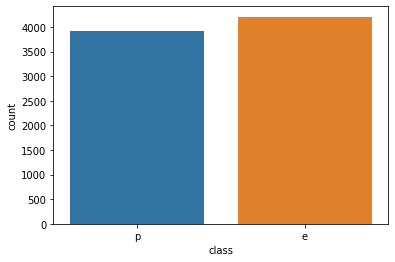

In [ ]:
x = df['class']
ax = sns.countplot(x=x, data=df)

In [ ]:
df.groupby(['class'])['class'].value_counts()

class  class
e      e        4208
p      p        3916
Name: class, dtype: int64

In [ ]:
def plot_data(hue, data):
  for i, col in enumerate(data.columns):
    plt.figure(i)
    ax = sns.countplot(x=data[col], hue=hue, data=data)

In [ ]:
hue = df['class']
data = df.drop(['class'], axis=1)
data.shape

(8124, 22)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


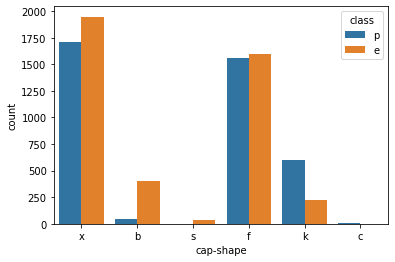

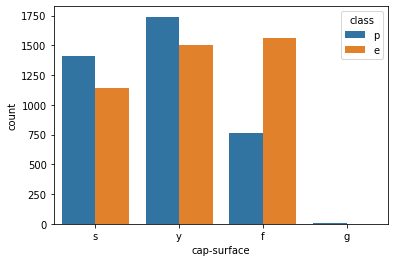

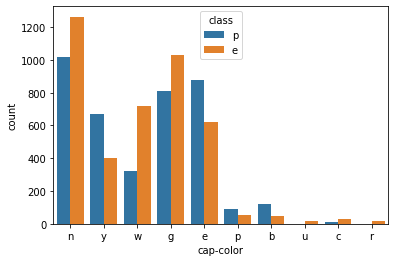

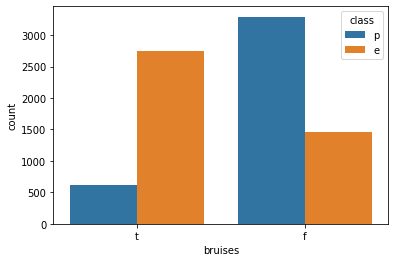

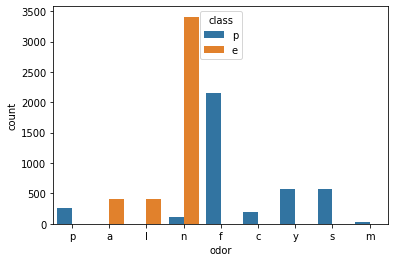

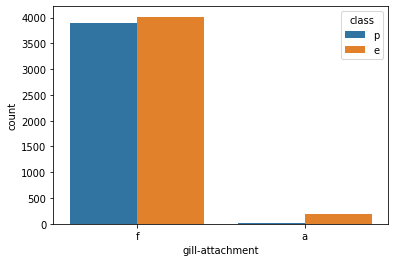

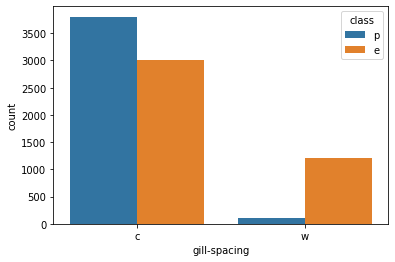

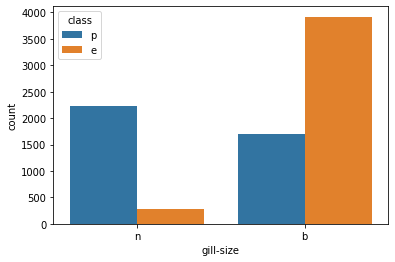

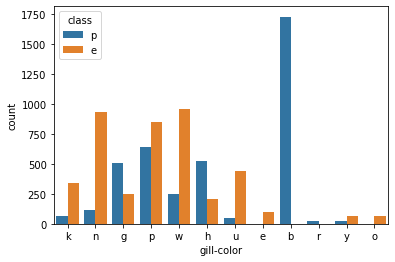

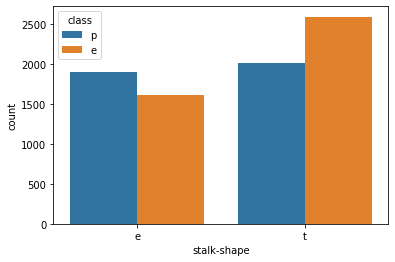

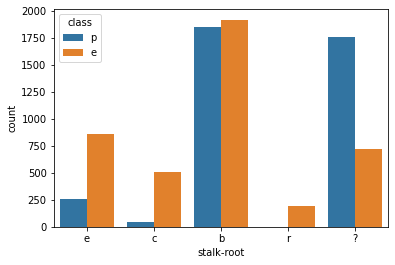

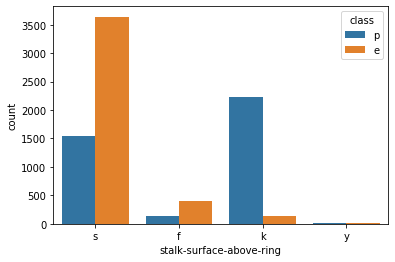

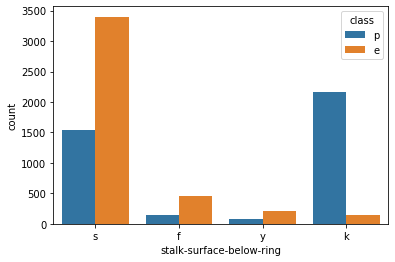

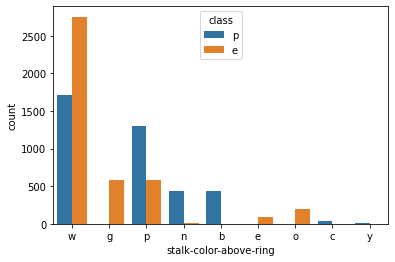

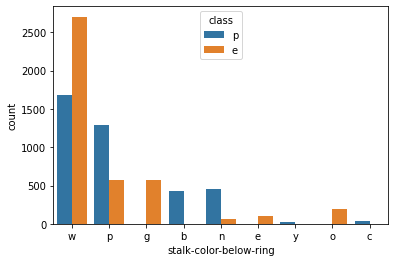

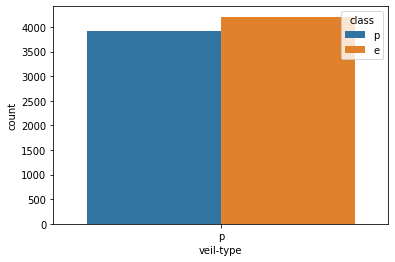

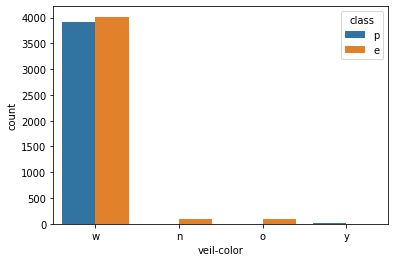

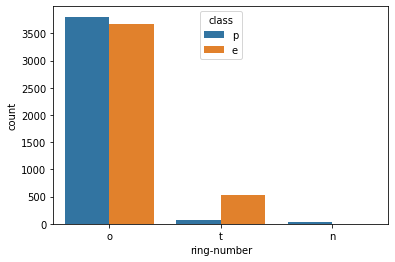

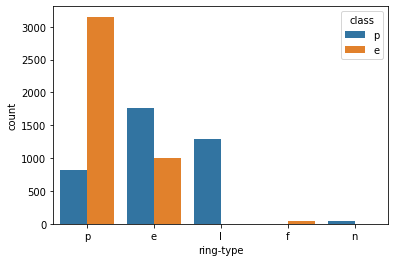

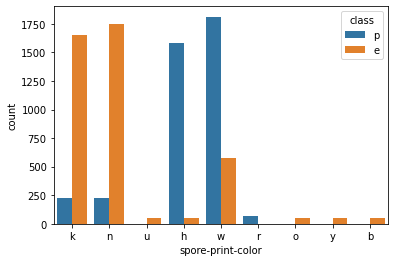

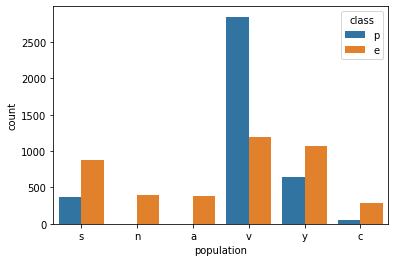

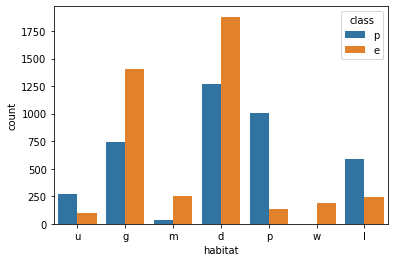

In [ ]:
plot_data(hue, data)

# Preprocessing

In [ ]:
# for col in df.columns:
#   print(f"{col}: {df[col].isnull().sum()}")

In [ ]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

OK. No null values.

In [ ]:
le = LabelEncoder()
labels = le.fit_transform(df['class'])
labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
encoded_data = pd.get_dummies(data)
encoded_data.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,...,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
data.shape

(8124, 22)

Before we have 22 columns, now we have 117 columns after one-hot-encoding.

OK now!

# Model

In [ ]:
labels.shape

(8124,)

In [ ]:
X = encoded_data
y = labels.reshape(-1, 1)

print(X.shape)
print(y.shape)

(8124, 117)
(8124, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_prob = logistic_reg.predict_proba(X_test)[:, 1]
y_labels = np.where(y_prob > 0.5, 1, 0)
y_labels

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
y_test

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
log_confusion_matrix = confusion_matrix(y_test, y_labels)
log_confusion_matrix

array([[843,   0],
       [  0, 782]])

No False-Positive and no False-Negative. A perfect model.

Now we'll look at ROC curve and AUC

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_labels)
roc_auc = auc(fpr, tpr)
roc_auc

1.0

ROC_AUC = 1 => perfect classification model

In [ ]:
def plot_roc(roc_auc):
  plt.figure(figsize=(7,7))
  plt.plot(fpr, tpr, color='red', label="AUC = %0.2f"%roc_auc)
  plt.plot([0,1], [0,1], 'k--')

  plt.title("Receiver Operating Characteristic")
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc='lower right')
  plt.axis('tight')

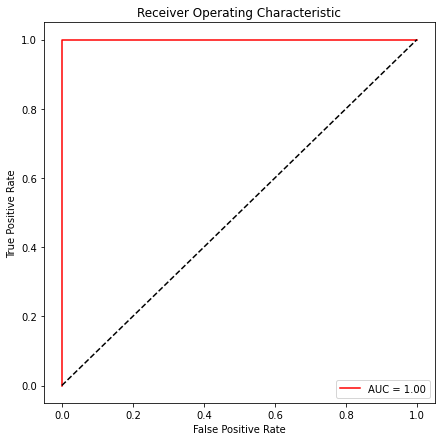

In [ ]:
plot_roc(roc_auc)

# Linear Discriminant Analysis (LDA)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

y_prob_lda = lda.predict_proba(X_test)[:,1]
y_pred_lda = np.where(y_prob_lda > 0.5, 1, 0)
y_pred_lda

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
lda_confus_mat = confusion_matrix(y_test, y_pred_lda)
lda_confus_mat

array([[843,   0],
       [  0, 782]])

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lda)
roc_auc_lda = auc(fpr, tpr)
roc_auc_lda

1.0

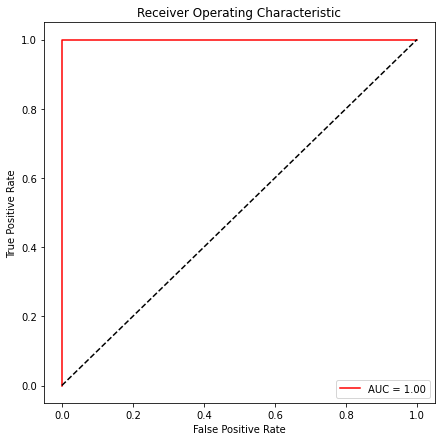

In [ ]:
plot_roc(roc_auc_lda)

# Quadratic Discriminant Analysis (QDA)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [ ]:
y_pred_qda = qda.predict_proba(X_test)[:,1]
y_pred_qda = np.where(y_pred_qda > 0.5, 1, 0)
y_pred_qda

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
qda_confus_mat = confusion_matrix(y_test, y_pred_qda)
qda_confus_mat

array([[843,   0],
       [  0, 782]])

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_qda)
roc_auc_qda = auc(fpr, tpr)
roc_auc_qda

1.0

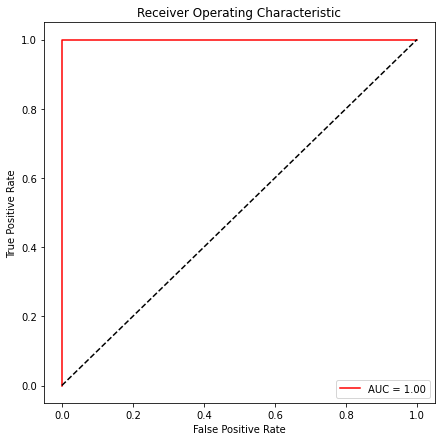

In [ ]:
plot_roc(roc_auc_qda)